In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skimage.io import imread
from skimage.transform import resize

In [3]:
categories = ["cats", "dogs"]
flat_data_arr = []
target_arr = []

data_dir = "DS"

for c in categories:
    path = os.path.join(data_dir, c)
    print(f"loading category: {c} ({path})")
    for img in os.listdir(path):
        img_arr = imread(os.path.join(path, img))
        img_data = resize(img_arr, (150, 150, 3)).flatten()
        flat_data_arr.append(img_data)
        target_arr.append(categories.index(c))
    print(f"loaded category {c} successfully!")

loading category: cats (DS/cats)
loaded category cats successfully!
loading category: dogs (DS/dogs)
loaded category dogs successfully!


In [6]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

In [7]:
flat_data.shape

(160, 67500)

In [9]:
df = pd.DataFrame(flat_data)
df["target"] = target
df.shape

(160, 67501)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,target
0,0.663005,0.663005,0.628527,0.663034,0.663062,0.622219,0.665515,0.667902,0.616280,0.667127,...,0.325547,0.333919,0.313340,0.434027,0.444964,0.418961,0.929215,0.930757,0.920344,0
1,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027755,0.027755,0.027755,0.031442,...,0.178500,0.197081,0.206767,0.127526,0.134664,0.120849,0.094547,0.097862,0.078442,0
2,0.152891,0.160734,0.141126,0.157203,0.165046,0.145439,0.161832,0.169675,0.150067,0.170293,...,0.535867,0.512648,0.471586,0.500310,0.485364,0.435750,0.485230,0.473360,0.400426,0
3,0.050250,0.030642,0.018877,0.055345,0.035737,0.023973,0.063962,0.044354,0.032589,0.069959,...,0.088374,0.049008,0.042400,0.082388,0.045124,0.040468,0.063734,0.040053,0.030444,0
4,0.746801,0.664834,0.570610,0.768159,0.669622,0.570784,0.766071,0.672205,0.569096,0.722603,...,0.622804,0.523688,0.484664,0.575169,0.504724,0.476907,0.572680,0.513406,0.485966,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.621803,0.589615,0.521395,0.622976,0.597152,0.525778,0.612878,0.597833,0.523429,0.608727,...,0.551879,0.532271,0.453840,0.564501,0.544059,0.466253,0.579663,0.546425,0.478216,1
156,0.815650,0.849131,0.845227,0.933889,0.955618,0.969236,0.891768,0.905157,0.937564,0.477821,...,0.313858,0.429106,0.209400,0.405920,0.508851,0.307331,0.362543,0.453008,0.271112,1
157,0.282480,0.176598,0.149147,0.263496,0.157613,0.130162,0.247879,0.141997,0.114546,0.244835,...,0.432193,0.445754,0.481071,0.494081,0.522637,0.566821,0.545343,0.581017,0.622002,1
158,0.391491,0.419671,0.282772,0.385622,0.433520,0.286712,0.378182,0.455436,0.294385,0.325471,...,0.386638,0.419167,0.324269,0.309277,0.339090,0.250009,0.270845,0.292507,0.207303,1


In [20]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
print(classification_report(y_test, y_pred, target_names=["cat", "dog"]))

              precision    recall  f1-score   support

         cat       0.50      0.50      0.50        16
         dog       0.50      0.50      0.50        16

    accuracy                           0.50        32
   macro avg       0.50      0.50      0.50        32
weighted avg       0.50      0.50      0.50        32



In [34]:
linear_model = svm.SVC(kernel="linear", random_state=32)
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

59.375

In [36]:
poly_model = svm.SVC(kernel="poly", degree=3, random_state=32)
poly_model.fit(x_train, y_train)
y_pred = poly_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

50.0

In [37]:
rbf_model = svm.SVC(kernel="rbf", degree=3, random_state=32)
rbf_model.fit(x_train, y_train)
y_pred = rbf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

50.0

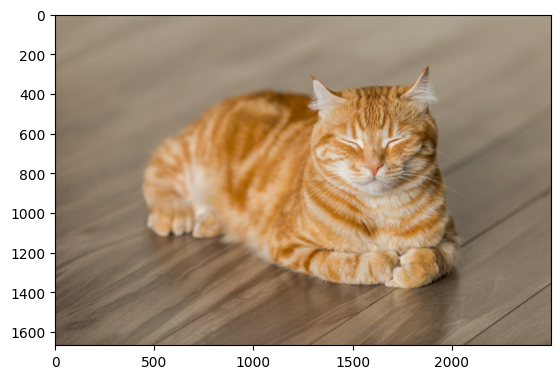

[1] class: cat


In [41]:
img = imread("michael-sum-LEpfefQf4rU-unsplash.jpg")
plt.imshow(img)
plt.show()
img_resize = resize(img, (150, 150, 3))
predicted_value = linear_model.predict([img_resize.flatten()])
print(predicted_value, "class:", "cat" if predicted_value >= 0.5 else "dog")